In [1]:
!nvidia-smi

Sat Mar 15 04:20:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P4             20W /   45W |    5745MiB /   6141MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%%time
import cudf

all_train = cudf.read_csv("all_train.csv")
display(all_train.head())
display(all_train.shape)

unique_masses = all_train['mass'].unique().values_host
print("Unique values in the 'mass' column:", unique_masses)

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


(7000000, 29)

Unique values in the 'mass' column: [1000.          750.         1250.          499.99996948 1500.        ]
CPU times: user 15.3 s, sys: 1.39 s, total: 16.7 s
Wall time: 31.4 s


In [4]:
%%time
import cudf

all_test = cudf.read_csv("all_test.csv")
display(all_test.head())
display(all_test.shape)

unique_masses = all_train['mass'].unique().values_host
print("Unique values in the 'mass' column:", unique_masses)

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.0,0.094394,0.012756,0.911933,-0.090831,-0.233575,-1.054221,-0.975937,-1.067278,-0.613850,...,-1.376865,0.067591,1.372576,-0.573682,-1.368692,-0.479379,1.529256,-0.575782,-1.290232,499.999969
1,1.0,0.327200,-0.239554,-1.592038,-2.324984,-0.507093,1.574625,-1.050106,0.968664,1.312387,...,-0.333943,1.058411,0.436482,-0.573682,-0.021727,-0.579184,-0.326044,-0.202462,-0.458558,750.000000
2,1.0,1.435010,0.400359,0.260659,0.829901,0.453934,-1.054221,1.169220,-0.541082,-1.230714,...,-1.654498,0.928221,0.639820,-0.573682,0.494222,-0.277551,-0.342811,1.774911,0.305253,1000.000000
3,0.0,-1.186220,0.443335,0.003997,0.484752,-1.159905,-1.054221,-1.581964,-0.391629,0.529644,...,-0.520804,-1.241476,-0.137923,-0.573682,-0.254372,-0.253829,0.333148,-0.554347,-0.905452,1000.000000
4,1.0,0.392461,-0.515250,-1.336984,1.895459,-1.068731,-0.005984,1.404694,0.176146,0.700568,...,-0.557441,0.838925,-0.128199,-0.573682,-0.629632,-0.673854,-0.238945,2.118990,0.938224,1250.000000


(3500000, 29)

Unique values in the 'mass' column: [1000.          750.         1250.          499.99996948 1500.        ]
CPU times: user 4.41 s, sys: 726 ms, total: 5.14 s
Wall time: 12.2 s


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-03-14 12:44:51.837] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


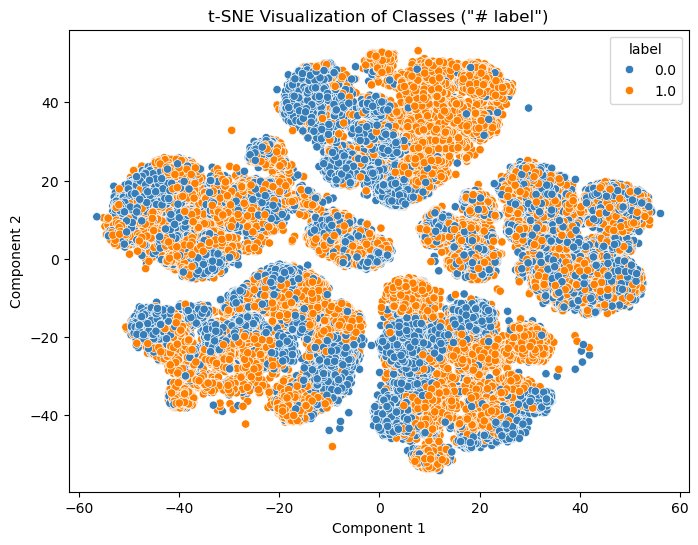

CPU times: user 1min, sys: 3.22 s, total: 1min 3s
Wall time: 1min 12s


In [4]:
%%time
import cudf
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read in the datasets (assuming these are already loaded in your environment)
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1000 rows from the combined dataset
sample_data = all_data.sample(n=100000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# Create a TSNE instance using the FFT approximation for speed.
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000,
    method='fft'
)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding explicitly to a host NumPy array.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = sample_data['# label'].to_pandas().values

# Use your specified palette
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes from "# label".
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization of Classes ("# label")')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-03-14 12:50:24.963] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


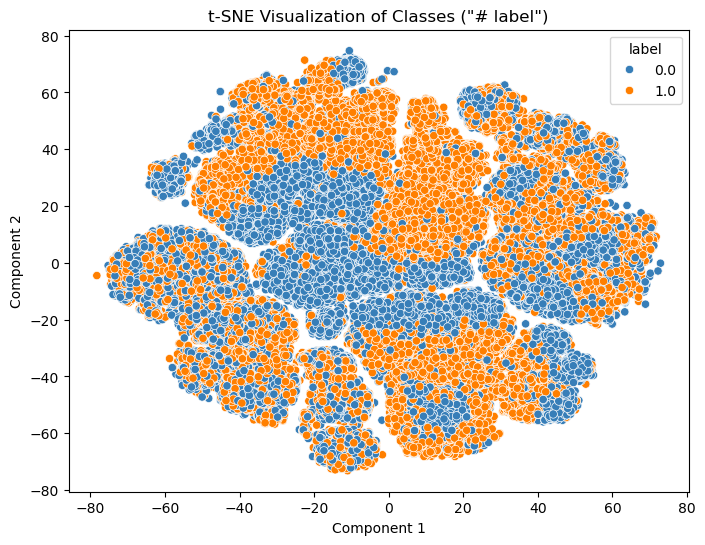

CPU times: user 52.7 s, sys: 2.35 s, total: 55.1 s
Wall time: 1min 4s


In [4]:
%%time
import cudf
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read in the datasets (assuming these are already loaded in your environment)
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 100000 rows from the combined dataset
sample_data = all_data.sample(n=100000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# Create a TSNE instance using the FFT approximation for speed.
# Lowering perplexity to 20 ensures that 3 * perplexity (i.e. 60) neighbors are sufficient.
tsne = TSNE(
    n_components=2,
    perplexity=20.0,           # Reduced perplexity to satisfy the nearest neighbor requirement
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000,
    method='fft'
)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding explicitly to a host NumPy array.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = sample_data['# label'].to_pandas().values

# Use your specified palette
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes from "# label".
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization of Classes ("# label")')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-03-14 13:05:12.613] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


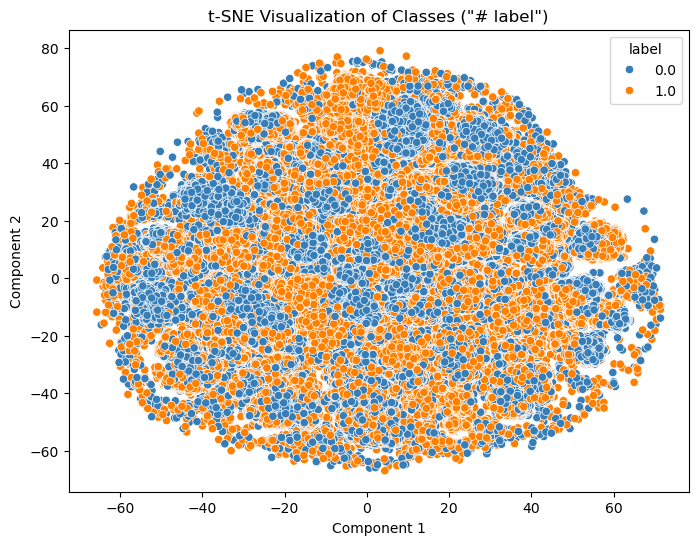

CPU times: user 3min 14s, sys: 3.91 s, total: 3min 18s
Wall time: 3min 24s


In [4]:
%%time
import cudf
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read in the datasets (assuming these are already loaded in your environment)
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Sample 1000 rows from the combined dataset
sample_data = all_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "# label" are features.
features = sample_data.drop(columns=['# label']).astype('float32')

# Create a TSNE instance using the FFT approximation for speed.
tsne = TSNE(
    n_components=2,
    perplexity=40.0,
    early_exaggeration=12.0,
    learning_rate=300.0,
    n_iter=1000,
    n_neighbors=120
)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding explicitly to a host NumPy array.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = sample_data['# label'].to_pandas().values

# Use your specified palette
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes from "# label".
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization of Classes ("# label")')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [ ]:
%%time
import cudf
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read in the datasets
all_train = cudf.read_csv("all_train.csv")
# all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets (using all data, no sampling)
# all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Prepare features: assume all columns except "# label" are features.
features = all_train.drop(columns=['# label']).astype('float32')

# Create a TSNE instance using the FFT approximation for speed.
tsne = TSNE(
    n_components=2,
    perplexity=50.0,            # Increased perplexity for larger datasets
    early_exaggeration=12.0,
    learning_rate=500.0,         # Increased learning rate
    n_iter=1500,                 # More iterations for convergence on large data
    n_neighbors=150              # Adjusted to roughly 3 x perplexity
)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding to a host NumPy array if necessary.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = all_data['# label'].to_pandas().values

# Define a palette for the classes
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes ("# label").
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization of Classes ("# label")')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [1]:
import cudf

# Read in the datasets
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")
# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Define mass values
mass_values = [1000.0, 750.0, 1250.0, 500.0, 1500.0]

# Create separate DataFrames for each mass value.
# For the approximate value 500, we filter rows with mass values close to 500.
df_1000 = all_data[all_data["mass"] == 1000.0]
df_750 = all_data[all_data["mass"] == 750.0]
df_1250 = all_data[all_data["mass"] == 1250.0]

# Use a tolerance to include values close to 500 (e.g., 499.5 to 500.5)
df_500 = all_data[(all_data["mass"] >= 499.5) & (all_data["mass"] < 500.5)]

df_1500 = all_data[all_data["mass"] == 1500.0]

# Print shapes of each DataFrame
print("Shape of df_1000:", df_1000.shape)
print("Shape of df_750:", df_750.shape)
print("Shape of df_1250:", df_1250.shape)
print("Shape of df_500:", df_500.shape)
print("Shape of df_1500:", df_1500.shape)

# Verify if the rows add up to rows in all_data
total_rows_split = (df_1000.shape[0] + df_750.shape[0] +
                    df_1250.shape[0] + df_500.shape[0] +
                    df_1500.shape[0])
print("Total rows in splits:", total_rows_split)
print("Total rows in all_data:", all_data.shape[0])


Shape of df_1000: (2101951, 29)
Shape of df_750: (2100051, 29)
Shape of df_1250: (2100780, 29)
Shape of df_500: (2097520, 29)
Shape of df_1500: (2099698, 29)
Total rows in splits: 10500000
Total rows in all_data: 10500000


In [ ]:
%%time
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

feature_columns = [col for col in df_500.columns if col != "mass"]
X_500 = df_500[feature_columns].to_pandas()

tsne = TSNE(n_components=2, random_state=42)
X_embedded_500 = tsne.fit_transform(X_500)

plt.figure()
plt.scatter(X_embedded_500[:, 0], X_embedded_500[:, 1])
plt.title("t-SNE for mass = 500")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [ ]:
%%time
import cudf
from cuml.manifold import TSNE
from cuml.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)

# Prepare features: assume all columns except "# label" are features.
features = all_data.drop(columns=['# label']).astype('float32')

# Cluster the data to define regions (using 100 clusters as an example).
n_clusters = 100  # Adjust based on your data's complexity
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Add cluster labels to the dataset
all_data['cluster'] = cluster_labels

# For each cluster, sample one representative instance.
representative_samples = all_data.groupby('cluster').head(1)

# Prepare the features for t-SNE (drop the label and cluster columns)
sample_features = representative_samples.drop(columns=['# label', 'cluster']).astype('float32')

# Create a TSNE instance using FFT approximation for speed.
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000,
    method='fft'
)

# Fit t-SNE on the representative samples
embedding = tsne.fit_transform(sample_features)

# Convert the embedding to a host NumPy array if necessary.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = representative_samples['# label'].to_pandas().values
embedding_df['cluster'] = representative_samples['cluster'].to_pandas().values

# Define a palette for the two classes
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding, coloring by the "# label" column.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette, s=50)
plt.title('t-SNE Visualization of Representative Samples by Regions')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


---
# Stratified
---

Combined dataset shape: (10500000, 29)
Original dataset class counts:
# label
1.0    5250124
0.0    5249876
Name: count, dtype: int64
Sampling fraction: 0.09523809523809523
Sampled dataset shape: (1000000, 29)
Sampled dataset class counts:
# label
1.0    500012
0.0    499988
Name: count, dtype: int64


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-03-18 07:06:47.550] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


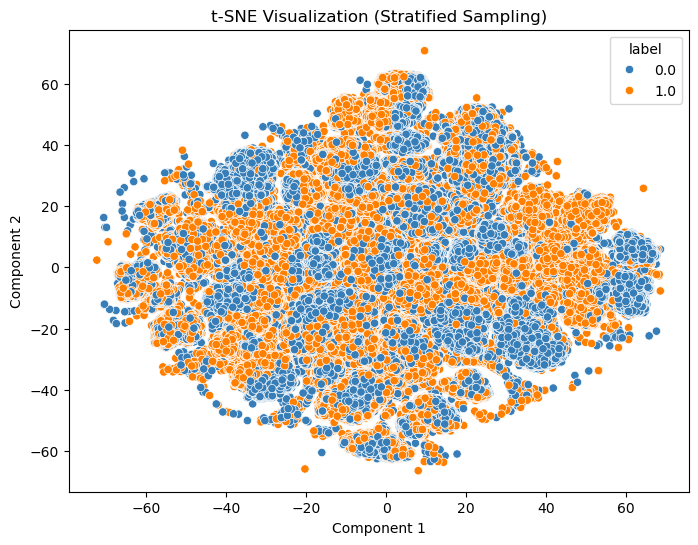

CPU times: user 23min 47s, sys: 5.71 s, total: 23min 53s
Wall time: 23min 50s


In [2]:
%%time
import cudf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.manifold import TSNE

# Load the datasets
all_train = cudf.read_csv("all_train.csv")
all_test  = cudf.read_csv("all_test.csv")

# Combine the datasets
all_data = cudf.concat([all_train, all_test], ignore_index=True)
print("Combined dataset shape:", all_data.shape)
print("Original dataset class counts:")
print(all_data['# label'].value_counts())

# Determine the overall sampling fraction to reach ~1,000,000 instances
target_total = 1000000
frac = target_total / len(all_data)
print("Sampling fraction:", frac)

# Perform stratified sampling for each class:
sampled_class_0 = all_data[all_data['# label'] == 0].sample(frac=frac, random_state=42)
sampled_class_1 = all_data[all_data['# label'] == 1].sample(frac=frac, random_state=42)

# Combine the sampled data and shuffle it
all_data_sampled = cudf.concat([sampled_class_0, sampled_class_1]).sample(frac=1, random_state=42)
print("Sampled dataset shape:", all_data_sampled.shape)
print("Sampled dataset class counts:")
print(all_data_sampled['# label'].value_counts())

# Separate features and label
features = all_data_sampled.drop(columns=['# label'])
labels = all_data_sampled['# label']

# Create a TSNE instance
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding to a NumPy array (if needed)
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = labels.to_pandas().values  # Convert cuDF Series to pandas Series

# Define the color palette for the two classes
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization (Stratified Sampling)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
